In [68]:
%matplotlib inline 
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
df = pd.read_csv('data/kc_house_data.csv')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [70]:
df.dropna(inplace=True)

In [71]:
df.replace({'NO': 0, 'YES': 1}, inplace = True)

In [72]:
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [73]:
df.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace= True)

In [74]:
df['yr_renovated'].mask(df['yr_renovated'] == 0, df['yr_built'], inplace = True)


In [75]:
df.drop(columns = ['yr_built', 'bedrooms', 'bathrooms'], inplace = True)

In [76]:
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [77]:
numeric_df = df.drop(columns = ['id', 'date', 'sqft_lot15', 'sqft_living15', 'sqft_lot'])

In [78]:
numeric_df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [79]:
numeric_df.replace({'7 Average': 7, '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6, '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3, '13 Mansion': 13}, inplace = True)

In [80]:
numeric_df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [81]:
numeric_df.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace = True)

In [82]:
numeric_df.drop(columns = 'sqft_basement', inplace = True)

In [83]:
numeric_df.corr()

,price,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_renovated,zipcode,lat,long
price,1.000000,0.706189,0.259505,0.274212,0.396862,0.034367,0.664146,0.612014,0.100023,-0.049502,0.306607,0.021215
sqft_living,0.706189,1.000000,0.359407,0.111491,0.285506,-0.062319,0.764251,0.876176,0.338318,-0.196537,0.058394,0.239521
floors,0.259505,0.359407,1.000000,0.018382,0.027518,-0.261013,0.459843,0.529101,0.499460,-0.058130,0.058190,0.129769
waterfront,0.274212,0.111491,0.018382,1.000000,0.409773,0.016454,0.083034,0.077165,-0.001108,0.030391,-0.015935,-0.042324
view,0.396862,0.285506,0.027518,0.409773,1.000000,0.046354,0.248679,0.170726,-0.023260,0.086479,0.008403,-0.078500
condition,0.034367,-0.062319,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.157958,-0.401191,0.001685,-0.022250,-0.105823
grade,0.664146,0.764251,0.459843,0.083034,0.248679,-0.147810,1.000000,0.758289,0.456067,-0.184120,0.117425,0.200680
sqft_above,0.612014,0.876176,0.529101,0.077165,0.170726,-0.157958,0.758289,1.000000,0.429655,-0.257359,0.009045,0.342034
yr_renovated,0.100023,0.338318,0.499460,-0.001108,-0.023260,-0.401191,0.456067,0.429655,1.000000,-0.316609,-0.130761,0.380645
zipcode,-0.049502,-0.196537,-0.058130,0.030391,0.086479,0.001685,-0.184120,-0.257359,-0.316609,1.000000,0.267763,-0.562154


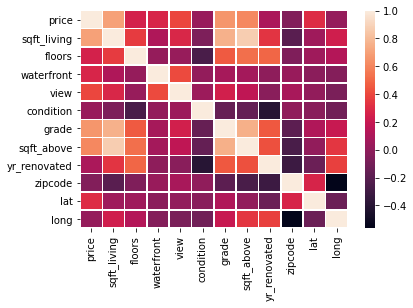

In [84]:
import seaborn as sns
sns.heatmap(numeric_df.corr(), linewidth = 0.5);

In [85]:
# from sklearn import preprocessing

# standardized_data = preprocessing.scale(numeric_df)

# df_standard = pd.DataFrame(standardized_data, columns = numeric_df.columns)

In [86]:
# import statsmodels.api as sm

# y= df_standard['price']
# X = sm.add_constant(df_standard.drop(columns = ['price', 'floors']))

# model = sm.OLS(y, X).fit()

# model.summary()

In [87]:
import statsmodels.api as sm

y= numeric_df['price']
X = sm.add_constant(numeric_df.drop(columns = ['price', 'floors', 'condition']))

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3758.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:23:42   Log-Likelihood:            -2.1551e+05
No. Observations:               15762   AIC:                         4.310e+05
Df Residuals:                   15752   BIC:                         4.311e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.83e+06   3.34e+06     -1.148      0.251   -1.04e+07    2.71e+06
sqft_living    163.8839      4.155     39.442      0.000     155.739     172.028
waterfront    6.365e+05   2.11e+04     30.140      0.000    5.95e+05    6.78e+05
view          6.104e+04   2584.940     23.612      0.000     5.6e+04    6.61e+04
grade         9.837e+04   2482.390     39.626      0.000    9.35e+04    1.03e+05
sqft_above      31.7497      4.669      6.800      0.000      22.597      40.902
yr_renovated -2104.1591     71.376    -29.480      0.000   -2244.064   -1964.255
zipcode       -549.2854     39.520    -13.899      0.000    -626.749    -471.822
lat           6.287e+05   1.29e+04     48.592      0.000    6.03e+05    6.54e+05
long         -2.563e+05   1.53e+04    -16.738      0.000   -2.86e+05   -2.26e+05
==============================================================================
Omnibus:                    13846.855   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1566114.714
Skew:                           3.724   Prob(JB):                         0.00
Kurtosis:                      51.261   Cond. No.                     1.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
X = numeric_df.drop(columns = ['price', 'floors', 'condition'])

lr = LinearRegression()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
lr.score(X_train, y_train)

0.6854185559349806

In [92]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([454990.1003917 , 494996.54725273, 653319.86866904, 536924.76176546,
       702478.49873166, 252326.21865475, 452101.72238186, 519409.43407622,
       229751.54591866, 332140.92330621])

In [93]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

128983.52533348848